In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datasets import create_dataframe_pac_2018

In [3]:
df = create_dataframe_pac_2018(
    path_data_nii='/home/lemaitre/Documents/data/pac_2018/public_data/',
    path_data_xls='/home/lemaitre/Documents/data/pac_2018/PAC2018_Covariates_Upload.xlsx')

In [4]:
df.head()

,Label,Age,Gender,TIV,t1
PAC_ID,,,,,
PAC2018_0001,1,56,1,1793.000000,/home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0002,1,21,1,1565.049438,/home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0004,1,33,2,1525.000000,/home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0005,1,33,1,1800.000000,/home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0006,1,61,2,1433.959595,/home/lemaitre/Documents/data/pac_2018/public_...


## Gender distribution

In [5]:
df_gender = df['Gender'].value_counts().to_frame().T.rename(index={'Gender': 'public\nset'})

In [6]:
df_gender_norm = df_gender.div(df_gender.sum(axis=1), axis=0)

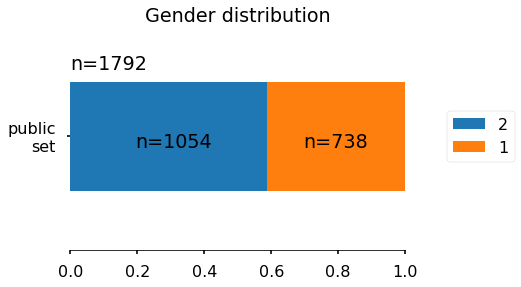

In [7]:
with sns.plotting_context('poster', font_scale=1):
    fig, ax = plt.subplots()
    df_gender_norm.plot.barh(stacked=True, ax=ax)

    sns.despine(offset=5, left=True)
    ax.set_xlim([0, 1])
    plt.title('Gender distribution')
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    
    n_patients = {}
    
    for p, idx in zip(ax.patches, [0, 1]):
        ax.annotate('n={:}'.format(int(df_gender.values.reshape(-1)[idx])),
                    (p.get_x() + (p.get_width() / 2) - 0.1, (p.get_y() + p.get_height() / 2.5)))
        n_patients[str(p.get_y())] = p.get_y()
    
    for (key, value), total_patients in zip(n_patients.items(), df_gender.sum(axis=1).values):
        ax.annotate('n={:}'.format(total_patients), (0, value + 0.56))

## Age distribution

In [8]:
df_age = df[['Age', 'Gender']].rename(index={'Age': 'public\nset'})

In [9]:
df_age[""] = ""

In [10]:
df_age.head()

,Age,Gender,
PAC_ID,,,
PAC2018_0001,56,1,
PAC2018_0002,21,1,
PAC2018_0004,33,2,
PAC2018_0005,33,1,
PAC2018_0006,61,2,


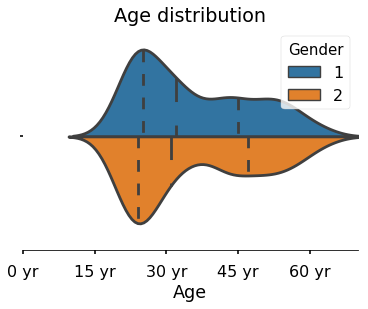

In [11]:
from matplotlib.ticker import FormatStrFormatter
with sns.plotting_context('poster', font_scale=1):
    fig, ax = plt.subplots()

    sns.violinplot(x="Age", y="", hue='Gender', data=df_age, split=True,
                   inner="quart", ax=ax, scale='width')
    ax.set_xlim([0, 70])

    sns.despine(offset=5, left=True)
    plt.title('Age distribution')
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d yr'))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))

## Label distribution

In [12]:
df_label = df['Label'].value_counts().to_frame().T.rename(index={'Label': 'public\nset'})

In [13]:
df_label_norm = df_label.div(df_label.sum(axis=1), axis=0)

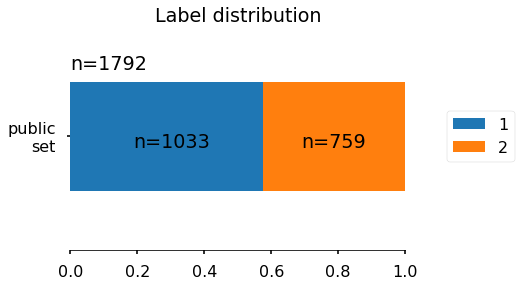

In [14]:
with sns.plotting_context('poster', font_scale=1):
    fig, ax = plt.subplots()
    df_label_norm.plot.barh(stacked=True, ax=ax)

    sns.despine(offset=5, left=True)
    ax.set_xlim([0, 1])
    plt.title('Label distribution')
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    
    n_patients = {}
    
    for p, idx in zip(ax.patches, [0, 1]):
        ax.annotate('n={:}'.format(int(df_label.values.reshape(-1)[idx])),
                    (p.get_x() + (p.get_width() / 2) - 0.1, (p.get_y() + p.get_height() / 2.5)))
        n_patients[str(p.get_y())] = p.get_y()
    
    for (key, value), total_patients in zip(n_patients.items(), df_label.sum(axis=1).values):
        ax.annotate('n={:}'.format(total_patients), (0, value + 0.56))

## Simple logistic regression the masked data

In [15]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
from nilearn.input_data import MultiNiftiMasker
from nilearn.regions import Parcellations

/home/lemaitre/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
from joblib import Memory
memory = Memory(location='./cache')

In [17]:
def _load_subjects_data(filenames_subject):
    path_mask = '/home/lemaitre/Documents/data/pac_2018/public_data/mask.nii.gz'
    parcellations = Parcellations(method='ward', n_parcels=20000, mask=path_mask)
    # multi_masker = MultiNiftiMasker(mask_img=path_mask, mask_strategy='background')
    # X = multi_masker.fit_transform(filenames_subject.tolist())
    X = parcellations.fit_transform(filenames_subject)
    return np.concatenate(X)
_load_subjects_data_cached = memory.cache(_load_subjects_data)

In [18]:
loader = FunctionTransformer(func=_load_subjects_data_cached, validate=False)

In [ ]:
loader.fit_transform(df['t1'].iloc[:10])

________________________________________________________________________________
[Memory] Calling __main__--home-lemaitre-Documents-code-research-predictive-analytics-competition-__ipython-input__._load_subjects_data...
_load_subjects_data(PAC_ID
PAC2018_0001    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0002    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0004    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0005    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0006    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0008    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0009    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0010    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0011    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0012    /home/lemaitre/Documents/data/pac_2018/public_...
Name: t1, dtype: object)
[MultiNiftiMasker.fit] Loading data from None
[MultiNiftiMasker.tran

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold

In [20]:
pipe = make_pipeline(loader, StandardScaler(), LogisticRegressionCV())

In [ ]:
score = cross_validate(pipe, df['t1'], df['Label'], cv=StratifiedKFold(n_splits=10),
                       scoring=['roc_auc'], n_jobs=1,
                       return_train_score=True, verbose=1000)

[CV]  ................................................................
________________________________________________________________________________
[Memory] Calling __main__--home-lemaitre-Documents-code-research-predictive-analytics-competition-__ipython-input__._load_subjects_data...
_load_subjects_data(PAC_ID
PAC2018_0218    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0222    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0223    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0227    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0229    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0230    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0231    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0232    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0233    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0234    /home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0235    /home/

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transfor

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image(
shape=(121, 145, 121, 1),
affine=array([[  -1.5,    0. ,    0. ,   90. ],
       [   0. ,    1.5,    0. , -126. ],
       [   0. ,    0. ,    1.5,  -72. ],
       [   0. ,    0. ,    0. ,
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform

In [139]:
#df.head()
score

,Label,Age,Gender,TIV,t1
PAC_ID,,,,,
PAC2018_0001,1,56,1,1793.000000,/home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0002,1,21,1,1565.049438,/home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0004,1,33,2,1525.000000,/home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0005,1,33,1,1800.000000,/home/lemaitre/Documents/data/pac_2018/public_...
PAC2018_0006,1,61,2,1433.959595,/home/lemaitre/Documents/data/pac_2018/public_...


In [30]:
df['Label'].value_counts()

1    1033
2     759
Name: Label, dtype: int64